<a href="https://colab.research.google.com/github/slavyolov/YOLO/blob/main/YOLOv3_OR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training + code :

## Training : 
### https://learning.oreilly.com/api/v1/continue/9781800563865/

## CODE
### https://github.com/PacktPublishing/Computer-Vision-YOLO-Custom-Object-Detection-with-Colab-GPU/blob/f90db3c5f3326d89282f249ede92234812c824a5/pretrained_yolov4_image_nms.py

# Setup ENV

In [ ]:
# Autoreload
%load_ext autoreload
%autoreload 2

#  mount your Google drive
from google.colab import drive
drive.mount('/content/Python_files', force_remount=True)

# Change working directory
%cd /content/Python_files/MyDrive/Python_files

print("\nList files and directories in working directory :\n")
!ls

# https://pypi.org/project/pyzbar/
# Install pyzbar

!apt-get install libzbar0
!pip install pyzbar[scripts]

Mounted at /content/Python_files
/content/Python_files/MyDrive/Python_files

List files and directories in working directory :
barcode_reader.py  YOLOv3_course_or
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzbar0 amd64 0.10+doc-10.1build

In [ ]:
# -*- coding: utf-8 -*-
from google.colab.patches import cv2_imshow     
import numpy as np
import cv2

# load the image to detect, get width, height 
# img_to_detect = cv2.imread('/content/Python_files/MyDrive/Python_files/YOLOv3_course_or/images/car_pic_1.jpg')  
img_to_detect = cv2.imread('/content/Python_files/MyDrive/Python_files/YOLOv3_course_or/images/traffic.jpg')  

# Image sizes
img_height = img_to_detect.shape[0]
img_width = img_to_detect.shape[1]

# convert to blob to pass into model
img_blob = cv2.dnn.blobFromImage(img_to_detect, 0.003922, (416, 416), swapRB=True, crop=False)
#recommended by yolo authors, scale factor is 0.003922=1/255, width,height of blob is 320,320
#accepted sizes are 320×320,416×416,608×608. More size means more accuracy but less speed.
#Sizes are determined based on the pre trained cfg and weights selected

# check the blob
# print(img_blob)

In [ ]:
# set of 80 class labels 
class_labels = ["person","bicycle","car","motorcycle","airplane","bus","train","truck","boat",
                "trafficlight","firehydrant","stopsign","parkingmeter","bench","bird","cat",
                "dog","horse","sheep","cow","elephant","bear","zebra","giraffe","backpack",
                "umbrella","handbag","tie","suitcase","frisbee","skis","snowboard","sportsball",
                "kite","baseballbat","baseballglove","skateboard","surfboard","tennisracket",
                "bottle","wineglass","cup","fork","knife","spoon","bowl","banana","apple",
                "sandwich","orange","broccoli","carrot","hotdog","pizza","donut","cake","chair",
                "sofa","pottedplant","bed","diningtable","toilet","tvmonitor","laptop","mouse",
                "remote","keyboard","cellphone","microwave","oven","toaster","sink","refrigerator",
                "book","clock","vase","scissors","teddybear","hairdrier","toothbrush"]


In [ ]:

#Declare List of colors as an array
#Green, Blue, Red, cyan, yellow, purple
#Split based on ',' and for every split, change type to int
#convert that to a numpy array to apply color mask to the image numpy array
class_colors = ["0,255,0", "0,0,255", "255,0,0", "255,255,0", "0,255,255"]  # RGB
class_colors = [np.array(every_color.split(",")).astype("int") for every_color in class_colors]
class_colors = np.array(class_colors)
class_colors = np.tile(class_colors,(16,1))  # We multiply by 16 because we have 80 categories (see preveious cell) and 5 * 16 == 80. TO get 80 different classes

# check the colors
# print(class_colors)

In [ ]:
# Loading pretrained model 
# input preprocessed blob into model and pass through the model
# obtain the detection predictions by the model using forward() method
yolo_model = cv2.dnn.readNetFromDarknet('/content/Python_files/MyDrive/Python_files/YOLOv3_course_or/model/yolov3.cfg', 
                                        '/content/Python_files/MyDrive/Python_files/YOLOv3_course_or/model/yolov3.weights')

yolo_model

<dnn_Net 0x7f16ddeca5d0>

In [ ]:
# Get all layers from the yolo network
# Loop and find the last layer (output layer) of the yolo network 
yolo_layers = yolo_model.getLayerNames()
yolo_output_layer = [yolo_layers[yolo_layer[0] - 1] for yolo_layer in yolo_model.getUnconnectedOutLayers()]

In [ ]:
# input preprocessed blob into model and pass through the model
yolo_model.setInput(img_blob)

# obtain the detection layers by forwarding through till the output layer
obj_detection_layers = yolo_model.forward(yolo_output_layer)

############# NMS - non-maximum suppression START 1 #############
# When the network detects the same object multiple time - just take the detection with the max cofidence value
# The expected result is : single detection for a single item

# initialization for non-max suppression (NMS)
# declare list for [class id], [box center, width & height[], [confidences]
class_ids_list = []
boxes_list = []
confidences_list = []
############# NMS - non-maximum suppression END   1 #############

predicted object car: 99.45%
predicted object car: 99.24%
predicted object car: 97.18%
predicted object car: 96.57%
predicted object car: 96.18%
predicted object car: 96.13%
predicted object car: 95.39%
predicted object car: 95.13%
predicted object car: 95.01%
predicted object car: 94.28%
predicted object car: 93.29%
predicted object car: 92.11%
predicted object car: 91.80%
predicted object car: 90.07%
predicted object car: 88.76%
predicted object car: 86.55%
predicted object truck: 85.98%
predicted object car: 85.33%
predicted object car: 85.29%
predicted object truck: 84.55%
predicted object car: 84.03%
predicted object car: 83.42%
predicted object car: 82.79%
predicted object car: 81.28%
predicted object truck: 80.13%
predicted object truck: 79.38%
predicted object car: 79.12%
predicted object car: 77.13%
predicted object car: 76.62%
predicted object car: 73.66%
predicted object car: 72.42%
predicted object car: 69.47%
predicted object car: 68.64%
predicted object car: 68.23%
predic

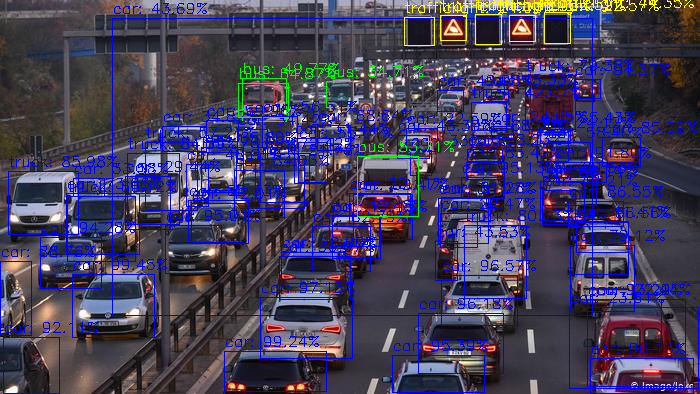

-1

In [ ]:
# loop over each of the layer outputs
confidence_p = 0.20

for object_detection_layer in obj_detection_layers:
	# loop over the detections
    for object_detection in object_detection_layer:
        
        # obj_detections[1 to 4] => will have the two center points, box width and box height
        # obj_detections[5] => will have scores for all objects within bounding box
        all_scores = object_detection[5:]
        predicted_class_id = np.argmax(all_scores)
        prediction_confidence = all_scores[predicted_class_id]
    
        # take only predictions with confidence more than (e.g. 20%, 50%)
        if prediction_confidence > confidence_p:
            # get the predicted label
            predicted_class_label = class_labels[predicted_class_id]

            #obtain the bounding box co-oridnates for actual image from resized image size
            bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
            (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
            start_x_pt = int(box_center_x_pt - (box_width / 2))
            start_y_pt = int(box_center_y_pt - (box_height / 2))
            
            ############# NMS - non-maximum suppression START 2 #############
            #save class id, start x, y, width & height, confidences in a list for nms processing
            #make sure to pass confidence as float and width and height as integers
            class_ids_list.append(predicted_class_id)
            confidences_list.append(float(prediction_confidence))
            boxes_list.append([start_x_pt, start_y_pt, int(box_width), int(box_height)])
            ############# NMS - non-maximum suppression END   2 #############

############# NMS - non-maximum suppression START 3 #############
# Applying the NMS will return only the selected max value ids while suppressing the non maximum (weak) overlapping bounding boxes      
# Non-Maxima Suppression confidence set as 0.5 & max_suppression threhold for NMS as 0.4 (adjust and try for better perfomance)
max_value_ids = cv2.dnn.NMSBoxes(boxes_list, confidences_list, 0.5, 0.4)  # Could be adjusted for better performance but this shall be good for the time beeing

# loop through the final set of detections remaining after NMS and draw bounding box and write text
for max_valueid in max_value_ids:
    max_class_id = max_valueid[0]
    box = boxes_list[max_class_id]
    start_x_pt = box[0]
    start_y_pt = box[1]
    box_width = box[2]
    box_height = box[3]
    
    #get the predicted class id and label
    predicted_class_id = class_ids_list[max_class_id]
    predicted_class_label = class_labels[predicted_class_id]
    prediction_confidence = confidences_list[max_class_id]

    ############# NMS - non-maximum suppression START 3 #############

    #obtain the bounding box end co-oridnates
    end_x_pt = start_x_pt + box_width
    end_y_pt = start_y_pt + box_height

    #get a random mask color from the numpy array of colors
    box_color = class_colors[predicted_class_id]

    #convert the color numpy array as a list and apply to text and box
    box_color = [int(c) for c in box_color]

    # print the prediction in console
    predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
    print("predicted object {}".format(predicted_class_label))

    # draw rectangle and text in the image
    cv2.rectangle(img_to_detect, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
    cv2.putText(img_to_detect, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)

cv2_imshow(img_to_detect)
cv2.waitKey(0)